In [2]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [3]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    # Creating our own classify method.
    # After iterating we return mode(votes), which just returns the most popular vote.
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    # Defining another parameter, confidence.
    # Since we have algorithms voting, we can tally the votes for and against the winning vote, and call this "confidence.
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [4]:
short_pos = open(r"D:\Study\Computers\ML Projects\alexaa97\movie_reviews\positive.txt", "r").read()
short_neg = open(r"D:\Study\Computers\ML Projects\alexaa97\movie_reviews\negative.txt", "r").read()

# move this up here
all_words = []
documents = []

In [5]:
allowed_word_types = ["J", "R", "V"] #j=adjectives, r=adverbs, v=verbs

In [6]:
# Splitting by a new line.
for p in short_pos.split('\n'):
    documents.append((p, "pos"))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

for p in short_neg.split('\n'):
    documents.append((p, "neg"))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

In [7]:
# Pickling documents.
save_documents = open("documents.pickle", "wb")
pickle.dump(documents, save_documents)
save_documents.close()

In [8]:
# Frequency Distribution
all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:5000]

save_word_features = open("word_features5k.pickle", "wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()

In [9]:
# Adjusting the feature finding function, using tokenizing by word in the document.
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [10]:
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# Shuffling
random.shuffle(featuresets)
print(len(featuresets))

# Partitioning the training and the testing sets.
training_set, testing_set = train_test_split(featuresets)

10664


In [11]:
# Pickling the featuresets.
save_features = open("featuresets.pickle", "wb")
pickle.dump(featuresets, save_features)
save_features.close()

In [12]:
# Training and successive pickling of the classifiers.
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set)) * 100)
classifier.show_most_informative_features(15)

save_classifier = open("originalnaivebayes5k.pickle", "wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set)) * 100)

save_classifier = open("MNB_classifier5k.pickle", "wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set)) * 100)

save_classifier = open("BernoulliNB_classifier5k.pickle", "wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:",
      (nltk.classify.accuracy(LogisticRegression_classifier, testing_set)) * 100)

save_classifier = open("LogisticRegression_classifier5k.pickle", "wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set)) * 100)

save_classifier = open("LinearSVC_classifier5k.pickle", "wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)

save_classifier = open("NuSVC_classifier5k.pickle", "wb")
pickle.dump(NuSVC_classifier, save_classifier)
save_classifier.close()

SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
print("SGDClassifier accuracy percent:", nltk.classify.accuracy(SGDC_classifier, testing_set) * 100)

save_classifier = open("SGDC_classifier5k.pickle", "wb")
pickle.dump(SGDC_classifier, save_classifier)
save_classifier.close()

Original Naive Bayes Algo accuracy percent: 70.70517629407351
Most Informative Features
                powerful = True              pos : neg    =     23.4 : 1.0
                  boring = True              neg : pos    =     21.9 : 1.0
                    warm = True              pos : neg    =     16.8 : 1.0
              engrossing = True              pos : neg    =     14.8 : 1.0
                provides = True              pos : neg    =     14.8 : 1.0
              refreshing = True              pos : neg    =     12.9 : 1.0
                    dull = True              neg : pos    =     12.3 : 1.0
                  unique = True              pos : neg    =     12.2 : 1.0
                   vivid = True              pos : neg    =     11.5 : 1.0
                supposed = True              neg : pos    =     11.1 : 1.0
                 shallow = True              neg : pos    =     11.1 : 1.0
            refreshingly = True              pos : neg    =     10.2 : 1.0
            

C:\Python36_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier accuracy percent: 68.52963240810203


In [13]:
# Voting classifier.
voted_classifier = VoteClassifier(
    classifier,
    LinearSVC_classifier,
    MNB_classifier,
    BernoulliNB_classifier,
    LogisticRegression_classifier,
    NuSVC_classifier,
    SGDC_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set)) * 100)

voted_classifier accuracy percent: 70.55513878469617


# From here, starts the sentiment analysis part

In [14]:
documents_f = open("documents.pickle", "rb")
documents = pickle.load(documents_f)
documents_f.close()

In [15]:
word_features5k_f = open("word_features5k.pickle", "rb")
word_features = pickle.load(word_features5k_f)
word_features5k_f.close()

In [16]:
featuresets_f = open("featuresets.pickle", "rb")
featuresets = pickle.load(featuresets_f)
featuresets_f.close()

random.shuffle(featuresets)
print(len(featuresets))

10664


In [17]:
def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

# From here, we'll read the hospitals review file, and perform sentiment analysis on them

In [18]:
hospital_data = []
with open(r"D:\Study\Computers\ML Projects\alexaa97\testing_data.txt") as hospitals_text:
    hospital_data = hospitals_text.readlines()

In [19]:
hospital_names = []
hospital_reviews = []

for i in range(len(hospital_data)):
    hospital_name, hospital_review = hospital_data[i].split(':')
    hospital_names.append(hospital_name)
    hospital_reviews.append(hospital_review)
print(hospital_names)
print(hospital_reviews)

['Mile End Hospital', 'Mile End Hospital', 'Mount Vernon Hospital', "Queen's Hospital", 'Cassel Hospital', "Queen's Hospital", "Queen's Hospital", 'University College Hospital', 'Mile End Hospital', 'Charing Cross Hospital', 'Friern Hospital', 'Cassel Hospital', 'Mile End Hospital', 'Rush Green Hospital', 'Rush Green Hospital', 'Atkinson Morley Hospital', 'Barnes Hospital', 'Barnet General Hospital', 'Bethlem Royal Hospital', 'Bexley Hospital', 'Bexley Hospital']
[' All above coordination ensured my uncle received the care he required and his wish to die at home was achieved.\n', ' Personally I think that patients should be a little better informed on how painful this procedure can actually be. Very bad service.\n', ' I find it very illuminating being with others with the same condition as myself and who are willing to share and talk about the problems we have. Talking about them helps to solve them.\n', " This has been my doctor's surgery for many, many years and I have always been tr

In [20]:
hospital_review_dict = {}
for i in range(len(hospital_reviews)):
    if hospital_names[i] in hospital_review_dict:
        hospital_review_dict[hospital_names[i]].append(hospital_reviews[i])
    else:
        hospital_review_dict[hospital_names[i]] = [hospital_reviews[i]]
print(hospital_review_dict)

{'Mile End Hospital': [' All above coordination ensured my uncle received the care he required and his wish to die at home was achieved.\n', ' Personally I think that patients should be a little better informed on how painful this procedure can actually be. Very bad service.\n', ' The staff have a lack of respect for the patients shouting out what’s wrong so the other patients can hear. Doctor saw me for a condition offering medication and other services but when I asked for a letter to prove this for my employer he said I’m lying about my condition? Very upsetting. Very degrading treatment.\n', " The staff at Mile End Hospital are rude and don't care about the patient. They make patients with emergencies wait for hours. Very concerning and bad service.\n"], 'Mount Vernon Hospital': [' I find it very illuminating being with others with the same condition as myself and who are willing to share and talk about the problems we have. Talking about them helps to solve them.\n'], "Queen's Hos

Now, instead of the reviews, we'll be inserting the sentiment analysis results in front of the hospital name.

In [21]:
hospital_review_dict = {}
for i in range(len(hospital_reviews)):
    if hospital_names[i] in hospital_review_dict:
        hospital_review_dict[hospital_names[i]].append(sentiment(hospital_reviews[i]))
    else:
        hospital_review_dict[hospital_names[i]] = [sentiment(hospital_reviews[i])]
print(hospital_review_dict)

{'Mile End Hospital': [('neg', 1.0), ('neg', 1.0), ('pos', 1.0), ('neg', 1.0)], 'Mount Vernon Hospital': [('pos', 0.8571428571428571)], "Queen's Hospital": [('pos', 0.5714285714285714), ('neg', 1.0), ('neg', 1.0)], 'Cassel Hospital': [('neg', 0.8571428571428571), ('neg', 1.0)], 'University College Hospital': [('neg', 1.0)], 'Charing Cross Hospital': [('pos', 0.7142857142857143)], 'Friern Hospital': [('neg', 1.0)], 'Rush Green Hospital': [('neg', 1.0), ('neg', 1.0)], 'Atkinson Morley Hospital': [('neg', 0.8571428571428571)], 'Barnes Hospital': [('neg', 1.0)], 'Barnet General Hospital': [('neg', 1.0)], 'Bethlem Royal Hospital': [('neg', 1.0)], 'Bexley Hospital': [('neg', 0.5714285714285714), ('neg', 1.0)]}


In [22]:
hospital_reviews_aggregated_dict = {}
for key, value in hospital_review_dict.items():
    senti_sum = 0
    val_num = 0
    for tup in value:
        val_num = val_num+1
        if tup[0] == 'neg':
            senti_sum = senti_sum - tup[1]
        elif tup[0] == 'pos':
            senti_sum = senti_sum + tup[1]
    hospital_reviews_aggregated_dict[key] = float(senti_sum)/float(val_num)
print(hospital_reviews_aggregated_dict)

{'Mile End Hospital': -0.5, 'Mount Vernon Hospital': 0.8571428571428571, "Queen's Hospital": -0.4761904761904762, 'Cassel Hospital': -0.9285714285714286, 'University College Hospital': -1.0, 'Charing Cross Hospital': 0.7142857142857143, 'Friern Hospital': -1.0, 'Rush Green Hospital': -1.0, 'Atkinson Morley Hospital': -0.8571428571428571, 'Barnes Hospital': -1.0, 'Barnet General Hospital': -1.0, 'Bethlem Royal Hospital': -1.0, 'Bexley Hospital': -0.7857142857142857}


In [23]:
from operator import itemgetter
from collections import OrderedDict

sorted_hospital_reviews_aggregated_dict = OrderedDict(sorted(hospital_reviews_aggregated_dict.items(), key=itemgetter(1)))

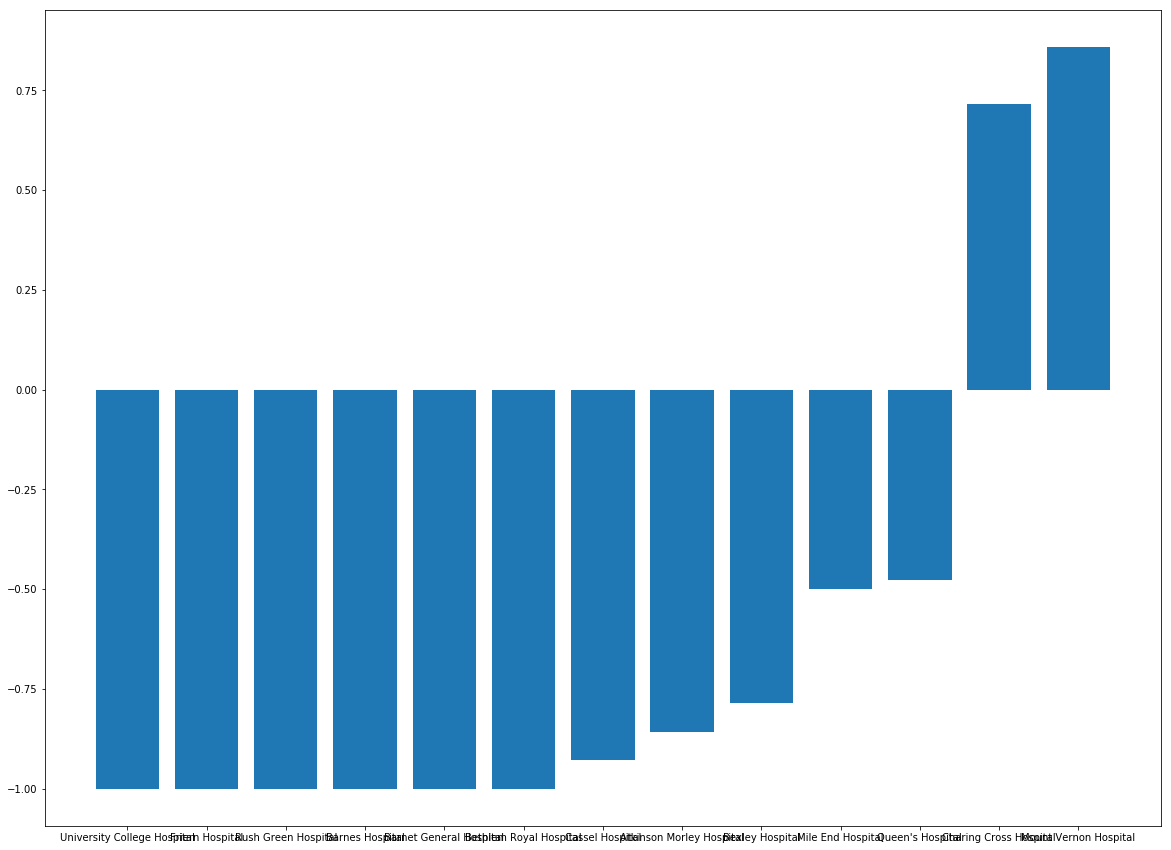

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.bar(range(len(sorted_hospital_reviews_aggregated_dict)), list(sorted_hospital_reviews_aggregated_dict.values()))
plt.xticks(range(len(sorted_hospital_reviews_aggregated_dict)), list(sorted_hospital_reviews_aggregated_dict.keys()))


plt.show()

In [25]:
#nltk.download('wordnet')

In [26]:
print(sorted_hospital_reviews_aggregated_dict)

OrderedDict([('University College Hospital', -1.0), ('Friern Hospital', -1.0), ('Rush Green Hospital', -1.0), ('Barnes Hospital', -1.0), ('Barnet General Hospital', -1.0), ('Bethlem Royal Hospital', -1.0), ('Cassel Hospital', -0.9285714285714286), ('Atkinson Morley Hospital', -0.8571428571428571), ('Bexley Hospital', -0.7857142857142857), ('Mile End Hospital', -0.5), ("Queen's Hospital", -0.4761904761904762), ('Charing Cross Hospital', 0.7142857142857143), ('Mount Vernon Hospital', 0.8571428571428571)])


In [27]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [28]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from rake_nltk import Rake
hospital_review_dict = {}
for i in range(len(hospital_reviews)):
    print("iteration: ", i, "length of hospital_reviews: ", len(hospital_reviews))
    r = Rake()
    text_tokens = tokenizer.tokenize(hospital_reviews[i])
    print()
    #print(text_tokens)
    for j in range(len(text_tokens)):
        text_tokens[j] = lem.lemmatize(text_tokens[j])
    #print(text_tokens)
    r.extract_keywords_from_sentences(text_tokens)
    phrases = r.get_ranked_phrases()
    print(phrases, '\n\n\n')
    if hospital_names[i] in hospital_review_dict:
        #print(phrases)
        hospital_review_dict[hospital_names[i]].append(phrases)
    else:
        hospital_review_dict[hospital_names[i]] = [phrases]
for x in hospital_review_dict:
    print(x, hospital_review_dict[x], '\n')
    print("with index: ")
    print(hospital_review_dict[x][0])

iteration:  0 length of hospital_reviews:  21

['wish', 'wa', 'uncle', 'required', 'received', 'home', 'ensured', 'die', 'coordination', 'care', 'achieved'] 



iteration:  1 length of hospital_reviews:  21

['think', 'service', 'procedure', 'personally', 'patient', 'painful', 'little', 'informed', 'better', 'bad', 'actually'] 



iteration:  2 length of hospital_reviews:  21

['willing', 'talking', 'talk', 'solve', 'share', 'problem', 'others', 'illuminating', 'help', 'find', 'condition'] 



iteration:  3 length of hospital_reviews:  21

['year', 'write', 'work', 'well', 'treatment', 'treated', 'think', 'surgery', 'something', 'shame', 'review', 'referred', 'prescribing', 'praised', 'praise', 'physiotherapy', 'people', 'patient', 'needed', 'many', 'listening', 'job', 'hour', 'hard', 'ha', 'good', 'fully', 'fantastic', 'explain', 'eg', 'efficient', 'effectively', 'due', 'doctors', 'doctor', 'department', 'dedication', 'complain', 'anything', 'another', 'amount', 'always'] 



iteratio

In [29]:
for k, v in hospital_review_dict.items():
    s_list = []
    for i in range(len(v)):
        s_list = s_list + v[i]
    #print("s_list:")
    #print(s_list)
    hospital_review_dict[k] = ' '.join(s_list)

print(hospital_review_dict)

{'Mile End Hospital': 'wish wa uncle required received home ensured die coordination care achieved think service procedure personally patient painful little informed better bad actually wrong upsetting treatment staff shouting service saw said respect prove patient offering medication lying letter lack hear employer doctor degrading condition asked wait staff service rude patient mile make hour hospital end emergency concerning care bad', 'Mount Vernon Hospital': 'willing talking talk solve share problem others illuminating help find condition', "Queen's Hospital": 'year write work well treatment treated think surgery something shame review referred prescribing praised praise physiotherapy people patient needed many listening job hour hard ha good fully fantastic explain eg efficient effectively due doctors doctor department dedication complain anything another amount always wrong worse verge time surgery staff solve service rude resulting reception really problem prescription patient 

In [30]:
print(hospital_review_dict)

{'Mile End Hospital': 'wish wa uncle required received home ensured die coordination care achieved think service procedure personally patient painful little informed better bad actually wrong upsetting treatment staff shouting service saw said respect prove patient offering medication lying letter lack hear employer doctor degrading condition asked wait staff service rude patient mile make hour hospital end emergency concerning care bad', 'Mount Vernon Hospital': 'willing talking talk solve share problem others illuminating help find condition', "Queen's Hospital": 'year write work well treatment treated think surgery something shame review referred prescribing praised praise physiotherapy people patient needed many listening job hour hard ha good fully fantastic explain eg efficient effectively due doctors doctor department dedication complain anything another amount always wrong worse verge time surgery staff solve service rude resulting reception really problem prescription patient 

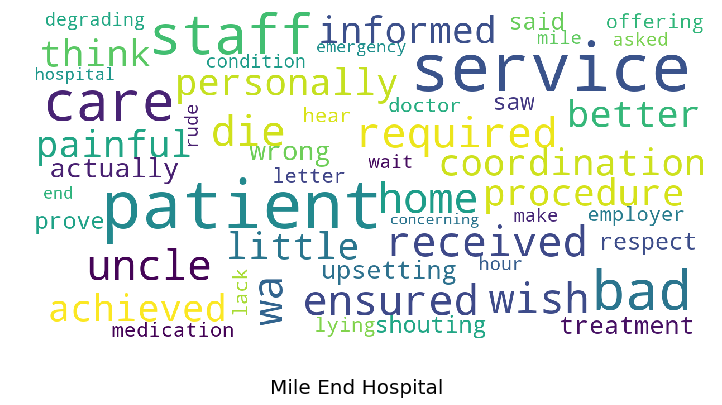

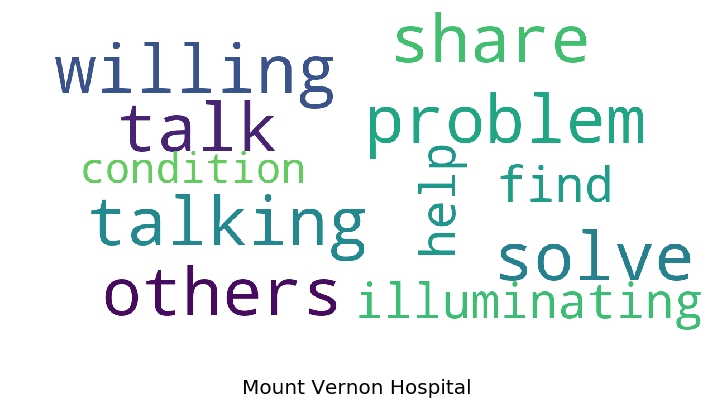

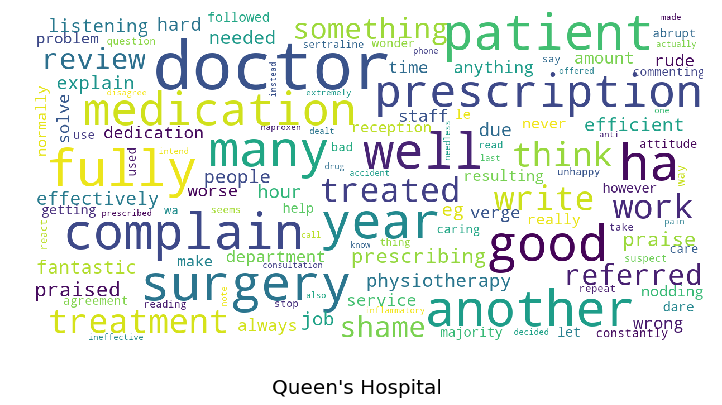

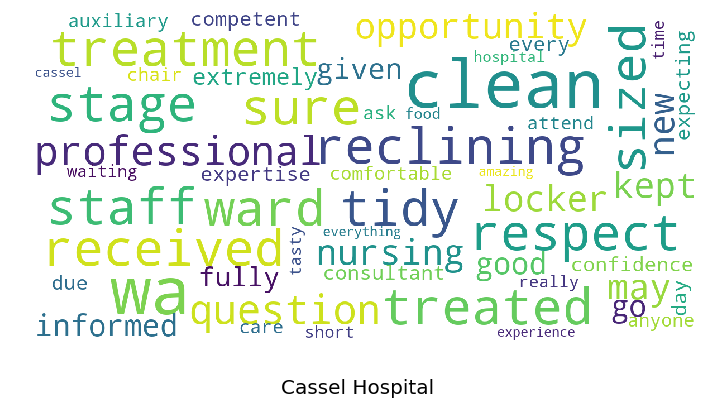

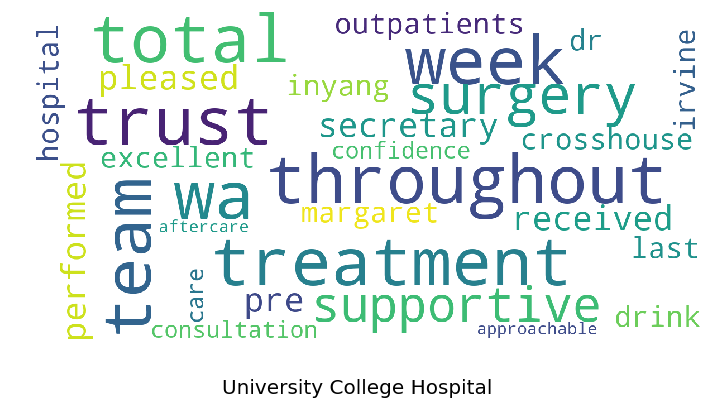

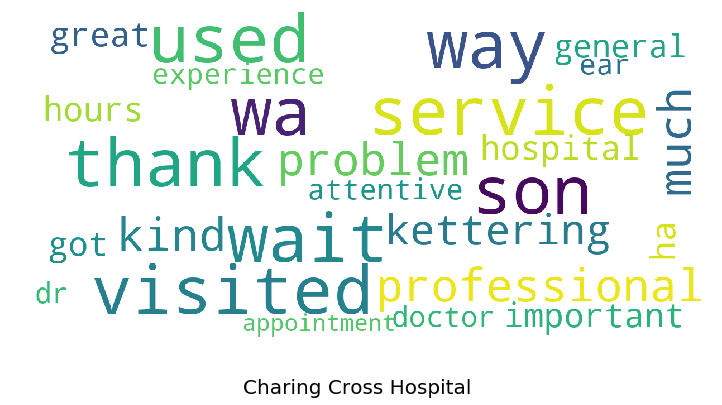

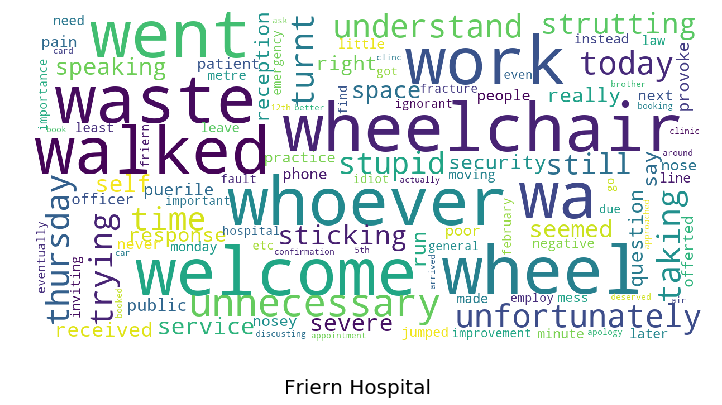

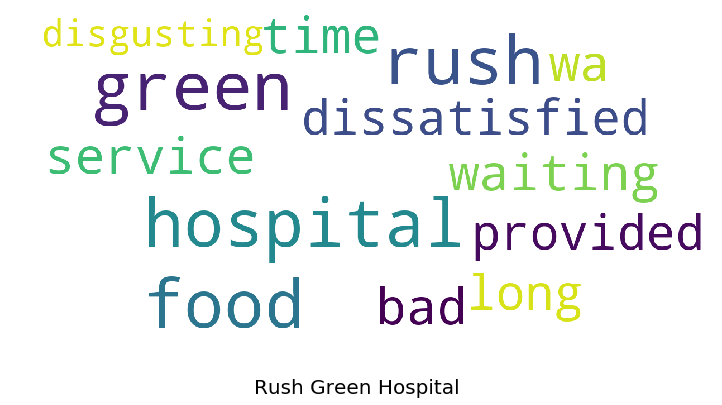

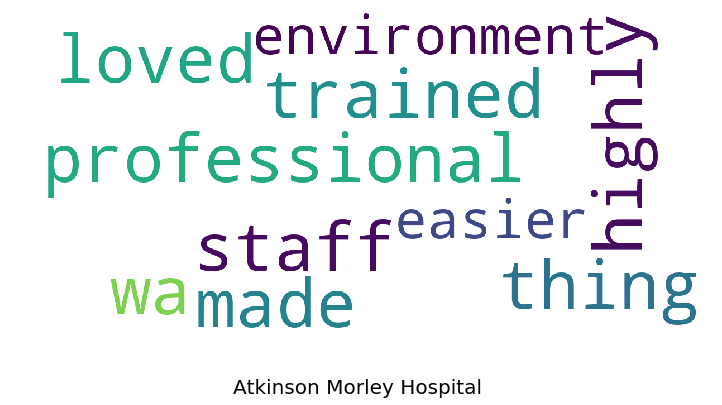

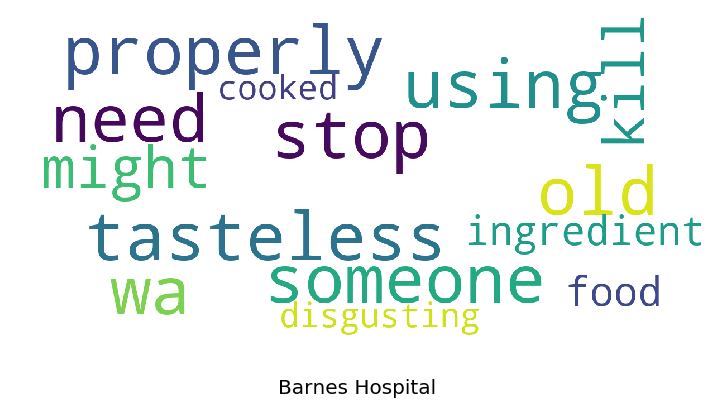

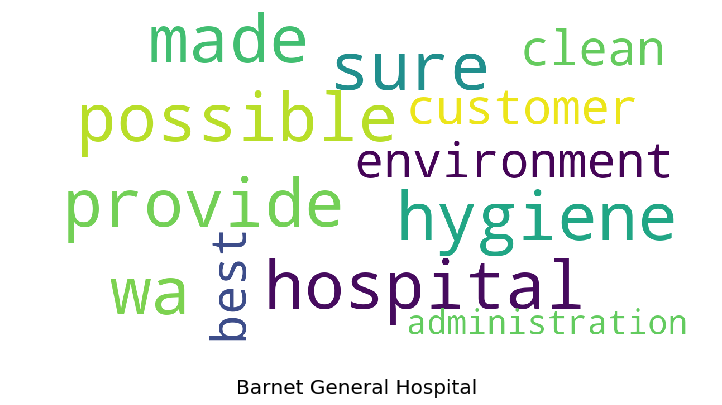

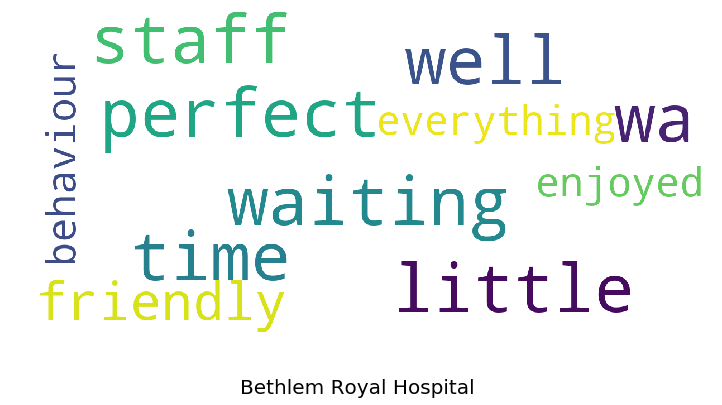

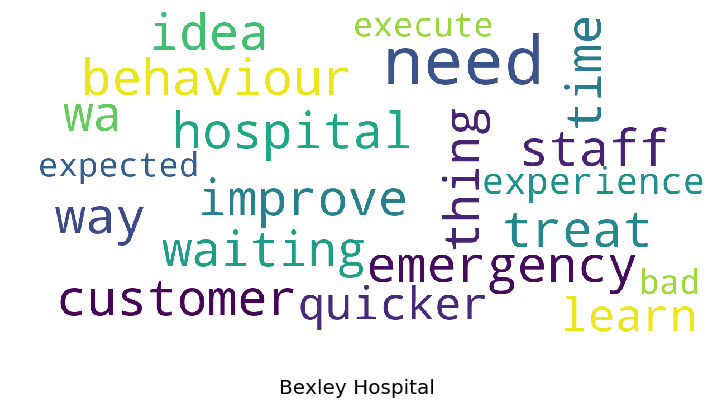

In [31]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    background = 'white'
    #if hospital_reviews_aggregated_dict[title] < 0:
    #    background = 'black'
    wordcloud = WordCloud(
        background_color=background,
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

for k, v in hospital_review_dict.items():
    show_wordcloud(v, title=k)

In [36]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

hygiene_words = ['hygiene', 'clean', 'unclean', 'dirty', 'tidy', 'recycle', 'environment']
staff_words = ['staff', 'behaviour', 'service', 'profession', 'manner', 'dedicated', 'active', 'friendly', 'rude', 'reception', 'treat']
timing_words = ['time', 'timing', 'late', 'quick', 'fast', 'slow', 'active', 'quick']
food_words = ['food', 'tasty', 'delicious', 'edible', 'disgust']



def stem_list(word_list):
    for i in range(len(word_list)):
        word_list[i] = ps.stem(word_list[i])
    return word_list

In [37]:
hygiene_words = stem_list(hygiene_words)
print(hygiene_words)

['hygien', 'clean', 'unclean', 'dirti', 'tidi', 'recycl', 'environ']


In [38]:
staff_words = stem_list(staff_words)
print(staff_words)

['staff', 'behaviour', 'servic', 'profess', 'manner', 'dedic', 'activ', 'friendli', 'rude', 'recept', 'treat']


In [39]:
timing_words = stem_list(timing_words)
print(timing_words)

['time', 'time', 'late', 'quick', 'fast', 'slow', 'activ', 'quick']


In [40]:
food_words = stem_list(food_words)
print(food_words)

['food', 'tasti', 'delici', 'edibl', 'disgust']


In [41]:
import math

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [44]:
for k, v in hospital_review_dict.items():
    hospital_review_dict[k] = tokenizer.tokenize(v)
print(hospital_review_dict)

TypeError: expected string or bytes-like object

In [45]:
for k, v in hospital_review_dict.items():
    hospital_review_dict[k] = stem_list(v)
print(hospital_review_dict)

{'Mile End Hospital': ['wish', 'wa', 'uncl', 'requir', 'receiv', 'home', 'ensur', 'die', 'coordin', 'care', 'achiev', 'think', 'servic', 'procedur', 'person', 'patient', 'pain', 'littl', 'inform', 'better', 'bad', 'actual', 'wrong', 'upset', 'treatment', 'staff', 'shout', 'servic', 'saw', 'said', 'respect', 'prove', 'patient', 'offer', 'medic', 'lie', 'letter', 'lack', 'hear', 'employ', 'doctor', 'degrad', 'condit', 'ask', 'wait', 'staff', 'servic', 'rude', 'patient', 'mile', 'make', 'hour', 'hospit', 'end', 'emerg', 'concern', 'care', 'bad'], 'Mount Vernon Hospital': ['will', 'talk', 'talk', 'solv', 'share', 'problem', 'other', 'illumin', 'help', 'find', 'condit'], "Queen's Hospital": ['year', 'write', 'work', 'well', 'treatment', 'treat', 'think', 'surgeri', 'someth', 'shame', 'review', 'refer', 'prescrib', 'prais', 'prais', 'physiotherapi', 'peopl', 'patient', 'need', 'mani', 'listen', 'job', 'hour', 'hard', 'ha', 'good', 'fulli', 'fantast', 'explain', 'eg', 'effici', 'effect', 'due

In [46]:
word_lists = [hygiene_words, staff_words, timing_words, food_words]

In [69]:
from collections import Counter

hygiene_ranks = {}
staff_ranks = {}
timing_ranks = {}
food_ranks = {}

In [70]:
def calc_ranks(ranks_dictionary, word_list):
    for k, v in hospital_review_dict.items():
        ctrA = Counter(word_list)
        ctrB = Counter(v)
        ranks_dictionary[k] = (counter_cosine_similarity(ctrA, ctrB))
    return Counter(ranks_dictionary)

In [71]:
hygiene_ranks = calc_ranks(hygiene_ranks, hygiene_words)
print(hygiene_ranks)

Counter({'Barnet General Hospital': 0.3273268353539886, 'Cassel Hospital': 0.14762034939153687, 'Atkinson Morley Hospital': 0.11396057645963795, 'Mile End Hospital': 0.0, 'Mount Vernon Hospital': 0.0, "Queen's Hospital": 0.0, 'University College Hospital': 0.0, 'Charing Cross Hospital': 0.0, 'Friern Hospital': 0.0, 'Rush Green Hospital': 0.0, 'Barnes Hospital': 0.0, 'Bethlem Royal Hospital': 0.0, 'Bexley Hospital': 0.0})


In [72]:
staff_ranks = calc_ranks(staff_ranks, staff_words)
print(staff_ranks)

Counter({'Bethlem Royal Hospital': 0.2727272727272727, 'Mile End Hospital': 0.2075143391598224, 'Bexley Hospital': 0.18860838403857946, "Queen's Hospital": 0.1344669704710584, 'Atkinson Morley Hospital': 0.09090909090909091, 'Cassel Hospital': 0.07850686719788597, 'Rush Green Hospital': 0.06030226891555273, 'Charing Cross Hospital': 0.05698028822981897, 'Friern Hospital': 0.053300179088902604, 'Mount Vernon Hospital': 0.0, 'University College Hospital': 0.0, 'Barnes Hospital': 0.0, 'Barnet General Hospital': 0.0})


In [73]:
timing_ranks = calc_ranks(timing_ranks, timing_words)
print(timing_ranks)

Counter({'Bethlem Royal Hospital': 0.17407765595569785, 'Bexley Hospital': 0.12038585308576923, 'Rush Green Hospital': 0.11547005383792516, 'Cassel Hospital': 0.07516460280028289, 'Friern Hospital': 0.05103103630798287, "Queen's Hospital": 0.04291410754228746, 'Mile End Hospital': 0.0, 'Mount Vernon Hospital': 0.0, 'University College Hospital': 0.0, 'Charing Cross Hospital': 0.0, 'Atkinson Morley Hospital': 0.0, 'Barnes Hospital': 0.0, 'Barnet General Hospital': 0.0})


In [74]:
food_ranks = calc_ranks(food_ranks, food_words)
print(food_ranks)

Counter({'Rush Green Hospital': 0.2683281572999747, 'Barnes Hospital': 0.23094010767585027, 'Cassel Hospital': 0.1164445019479164, 'Mile End Hospital': 0.0, 'Mount Vernon Hospital': 0.0, "Queen's Hospital": 0.0, 'University College Hospital': 0.0, 'Charing Cross Hospital': 0.0, 'Friern Hospital': 0.0, 'Atkinson Morley Hospital': 0.0, 'Barnet General Hospital': 0.0, 'Bethlem Royal Hospital': 0.0, 'Bexley Hospital': 0.0})


In [75]:
for k, v in hygiene_ranks.items():
    hygiene_ranks[k] = v*sorted_hospital_reviews_aggregated_dict[k]
hygiene_ranks = {k:v for k,v in hygiene_ranks.items() if v != 0}
print(hygiene_ranks)

{'Cassel Hospital': -0.1370760387207128, 'Atkinson Morley Hospital': -0.09768049410826109, 'Barnet General Hospital': -0.3273268353539886}


In [76]:
for k, v in staff_ranks.items():
    staff_ranks[k] = v*sorted_hospital_reviews_aggregated_dict[k]
staff_ranks = {k:v for k,v in staff_ranks.items() if v != 0}
print(staff_ranks)

{'Mile End Hospital': -0.1037571695799112, "Queen's Hospital": -0.06403189070050401, 'Cassel Hospital': -0.0728992338266084, 'Charing Cross Hospital': 0.04070020587844213, 'Friern Hospital': -0.053300179088902604, 'Rush Green Hospital': -0.06030226891555273, 'Atkinson Morley Hospital': -0.07792207792207792, 'Bethlem Royal Hospital': -0.2727272727272727, 'Bexley Hospital': -0.14819230174459816}


In [77]:
for k, v in timing_ranks.items():
    timing_ranks[k] = v*sorted_hospital_reviews_aggregated_dict[k]
timing_ranks = {k:v for k,v in timing_ranks.items() if v != 0}
print(timing_ranks)

{"Queen's Hospital": -0.020435289305851173, 'Cassel Hospital': -0.06979570260026269, 'Friern Hospital': -0.05103103630798287, 'Rush Green Hospital': -0.11547005383792516, 'Bethlem Royal Hospital': -0.17407765595569785, 'Bexley Hospital': -0.0945888845673901}


In [78]:
for k, v in food_ranks.items():
    food_ranks[k] = v*sorted_hospital_reviews_aggregated_dict[k]
food_ranks = {k:v for k,v in food_ranks.items() if v != 0}
print(food_ranks)

{'Cassel Hospital': -0.10812703752306524, 'Rush Green Hospital': -0.2683281572999747, 'Barnes Hospital': -0.23094010767585027}


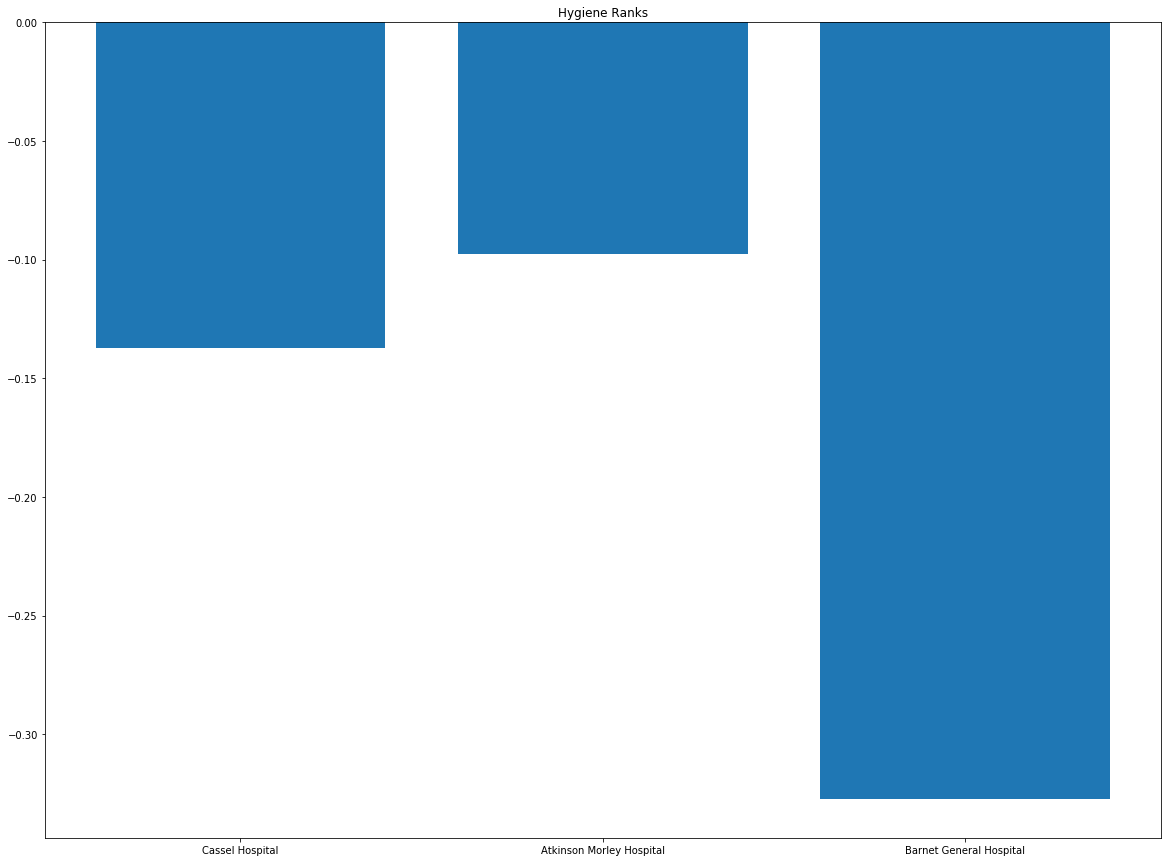

In [79]:
plt.figure(figsize=(20, 15))
plt.title("Hygiene Ranks")
plt.bar(range(len(hygiene_ranks)), list(hygiene_ranks.values()))
plt.xticks(range(len(hygiene_ranks)), list(hygiene_ranks.keys()))


plt.show()

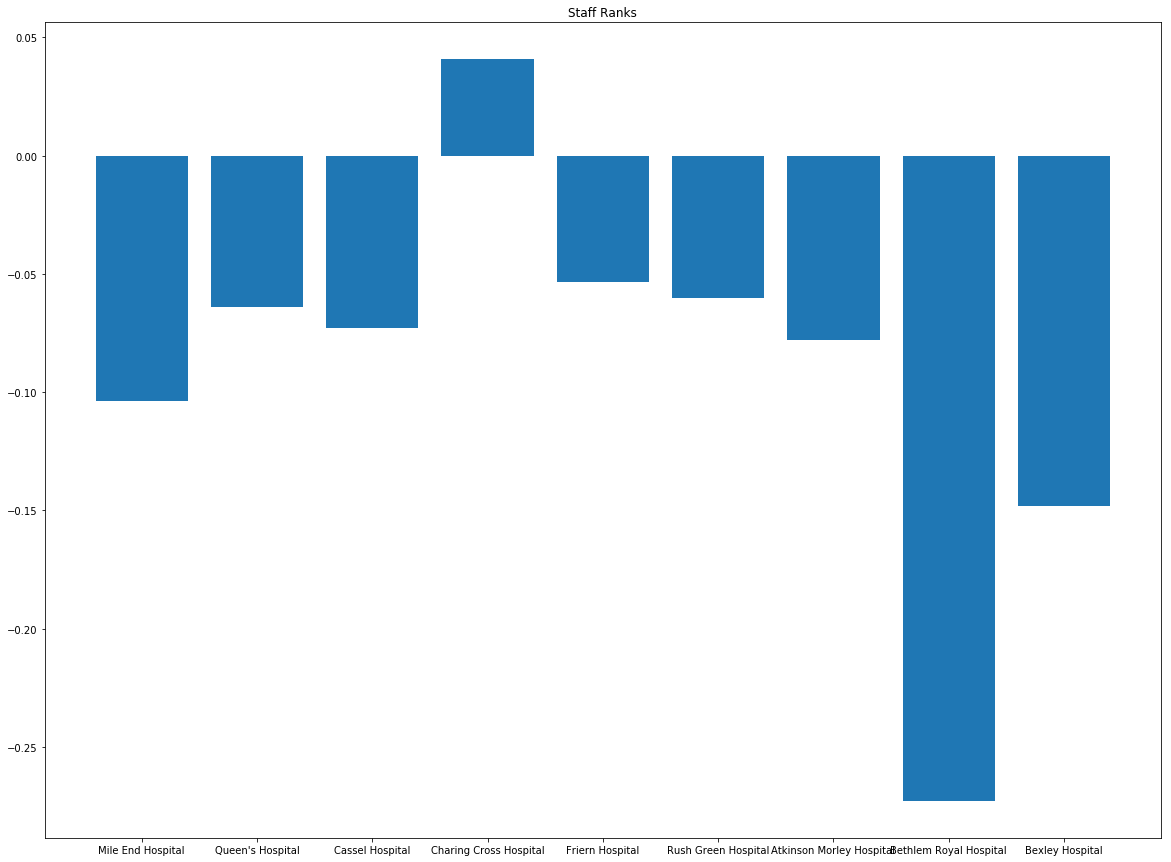

In [80]:
plt.figure(figsize=(20, 15))
plt.title("Staff Ranks")
plt.bar(range(len(staff_ranks)), list(staff_ranks.values()))
plt.xticks(range(len(staff_ranks)), list(staff_ranks.keys()))


plt.show()

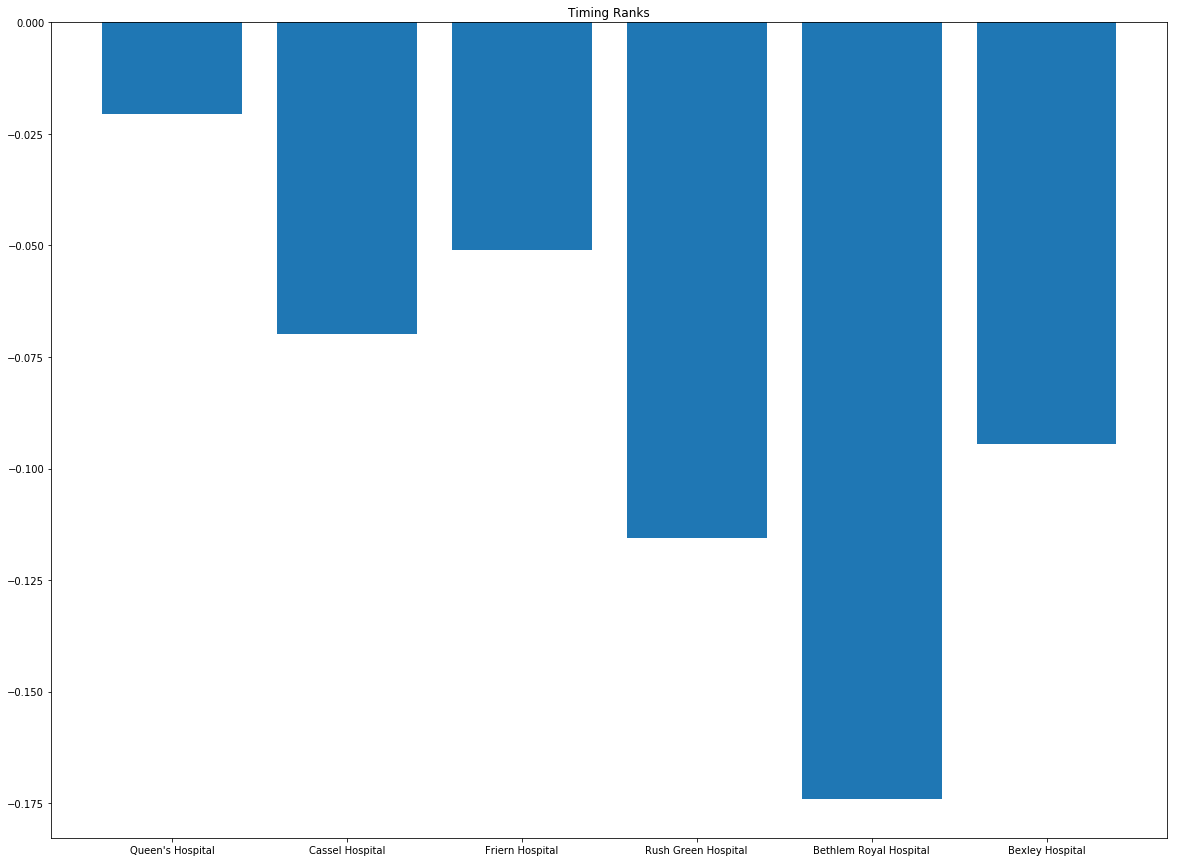

In [81]:
plt.figure(figsize=(20, 15))
plt.title("Timing Ranks")
plt.bar(range(len(timing_ranks)), list(timing_ranks.values()))
plt.xticks(range(len(timing_ranks)), list(timing_ranks.keys()))


plt.show()

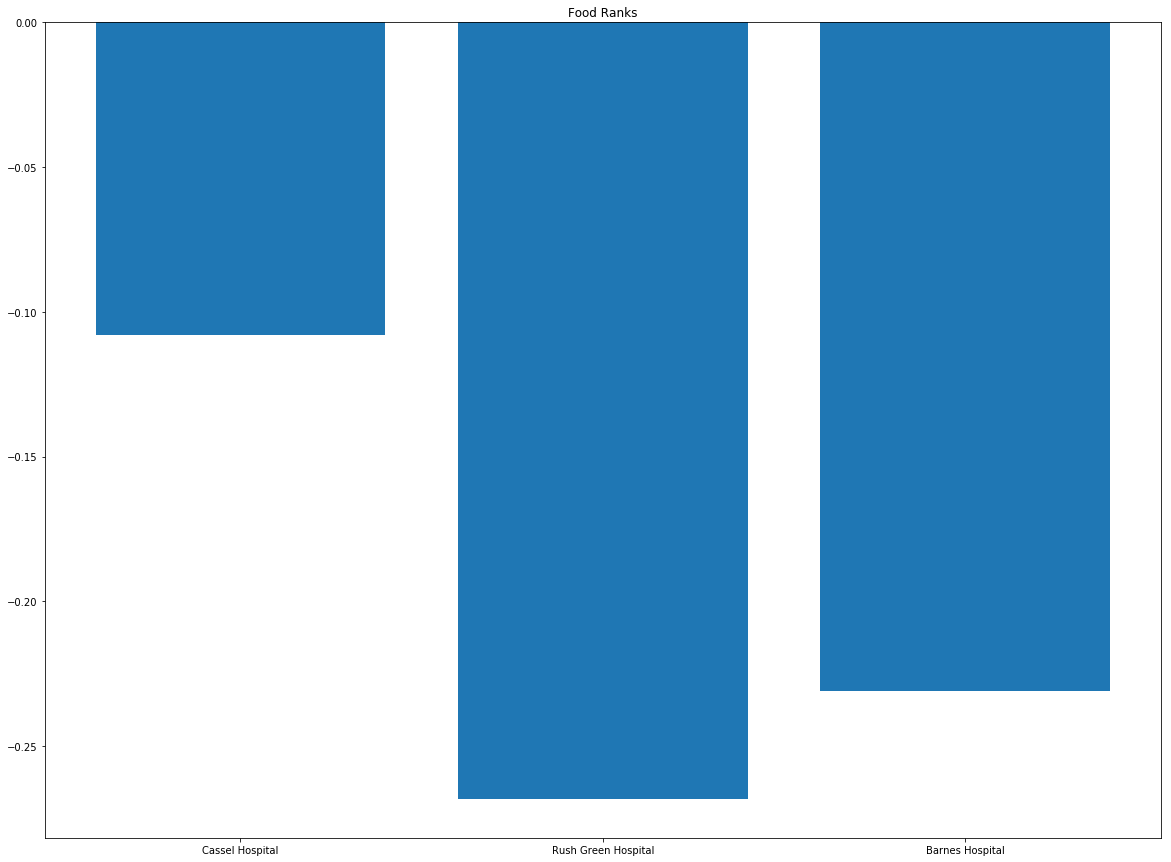

In [82]:
plt.figure(figsize=(20, 15))
plt.title("Food Ranks")
plt.bar(range(len(food_ranks)), list(food_ranks.values()))
plt.xticks(range(len(food_ranks)), list(food_ranks.keys()))


plt.show()